## MSA 2024 Phase 2 - Part 1

In [97]:
#Import related libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### 1. Find all variables and understand them

Here we choose store_sales.csv from X store sales to start our analyzing. 
1. Firstly we should read the csv by pandas into pandas dataframe.
2. Print first ten instances
3. Generally understand data structures like how many rows and columns, and data types
4. More details about the mean and standard deviation of the numerical columns 

In [98]:
# Read the store sales dataset from resources folder 
df = pd.read_csv('./../../resources/datasets/X store sales/store_sales.csv')

# Display the first ten instances, so we can have a brief understanding of our data 
print(df.head(10))

   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156    11/8/16  11/11/16    Second Class    CG-12520   
1       2  CA-2016-152156    11/8/16  11/11/16    Second Class    CG-12520   
2       4  US-2015-108966   10/11/15  10/18/15  Standard Class    SO-20335   
3       6  CA-2014-115812     6/9/14   6/14/14  Standard Class    BH-11710   
4      11  CA-2014-115812     6/9/14   6/14/14  Standard Class    BH-11710   
5      24  US-2017-156909    7/16/17   7/18/17    Second Class    SF-20065   
6      25  CA-2015-106320    9/25/15   9/30/15  Standard Class    EB-13870   
7      28  US-2015-150630    9/17/15   9/21/15  Standard Class    TB-21520   
8      30  US-2015-150630    9/17/15   9/21/15  Standard Class    TB-21520   
9      37  CA-2016-117590    12/8/16  12/10/16     First Class    GH-14485   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1

In [99]:
# More information about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

Data structure:
- The dataset has 2121 entries and 21 columns
- Data types include `int64`, `object`, `float64`

In [100]:
# Provide key statistical measures
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


Statistical:
- Sales range from 1.892 to 4416.174 with mean 349.834 and standard deviation 503.179
- Quantity ranges from 1 to 14 with mean 3.785 and standard deviation 2.251
- Discount ranges from 0 to 0.7 with mean 0.173 and standard deviation 0.181
- Profit ranges from -1862.312 to 1013.127 with mean 8.699 and standard deviation 136.049

Using histograms and box plots for numerical columns, identify potential patterns or trends. Create 2 * 2 figures for histogram and box plot respectively. 

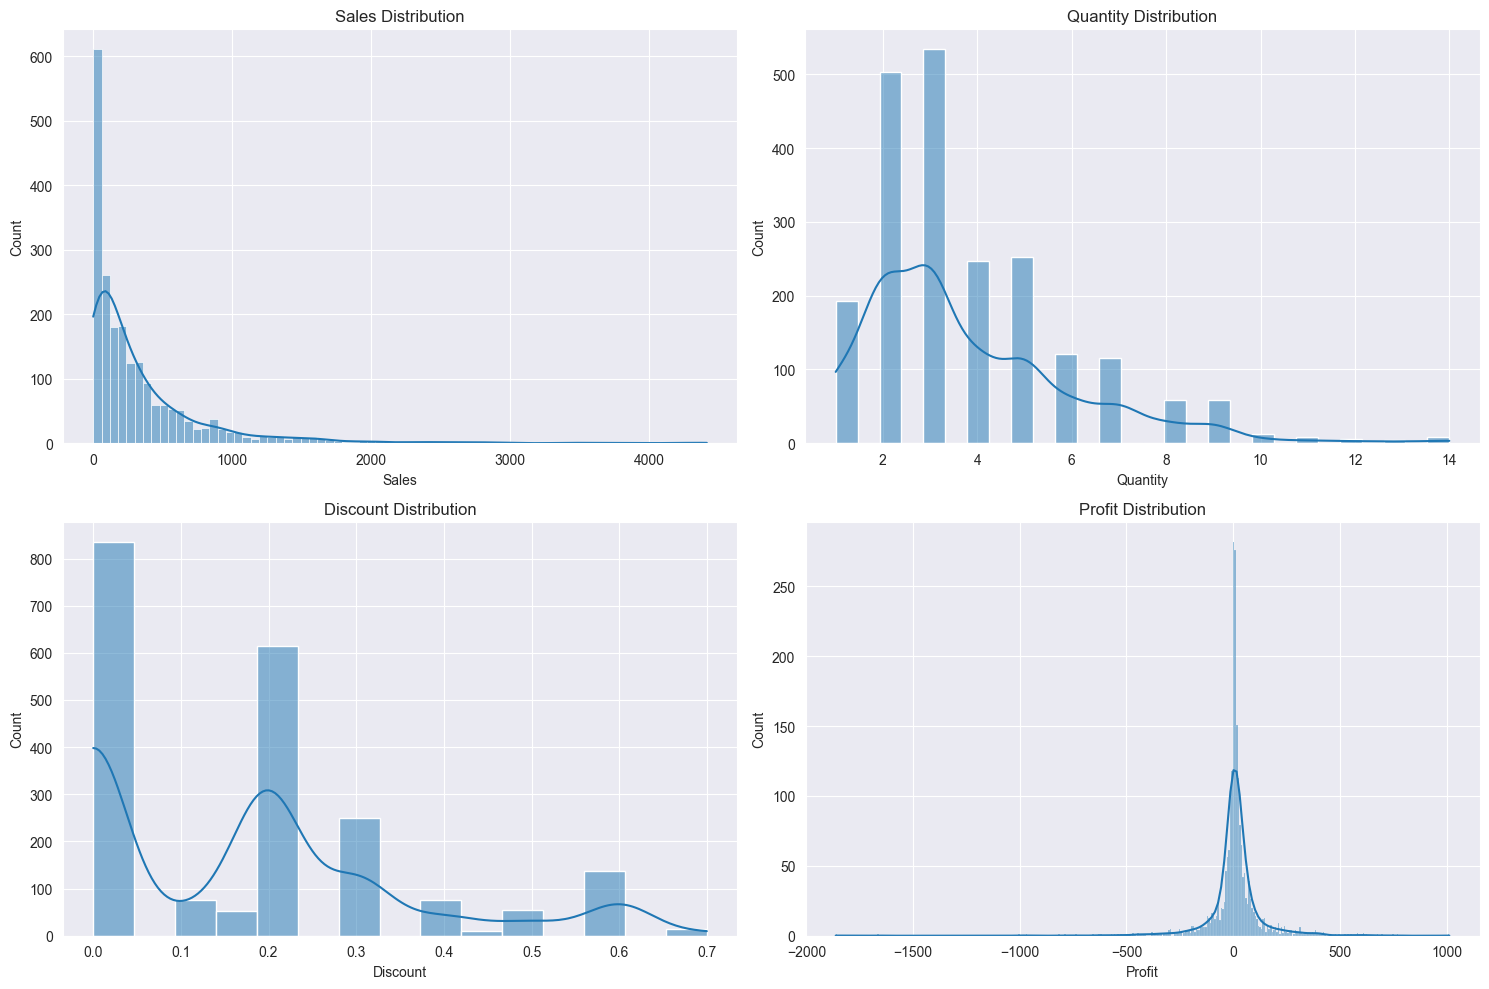

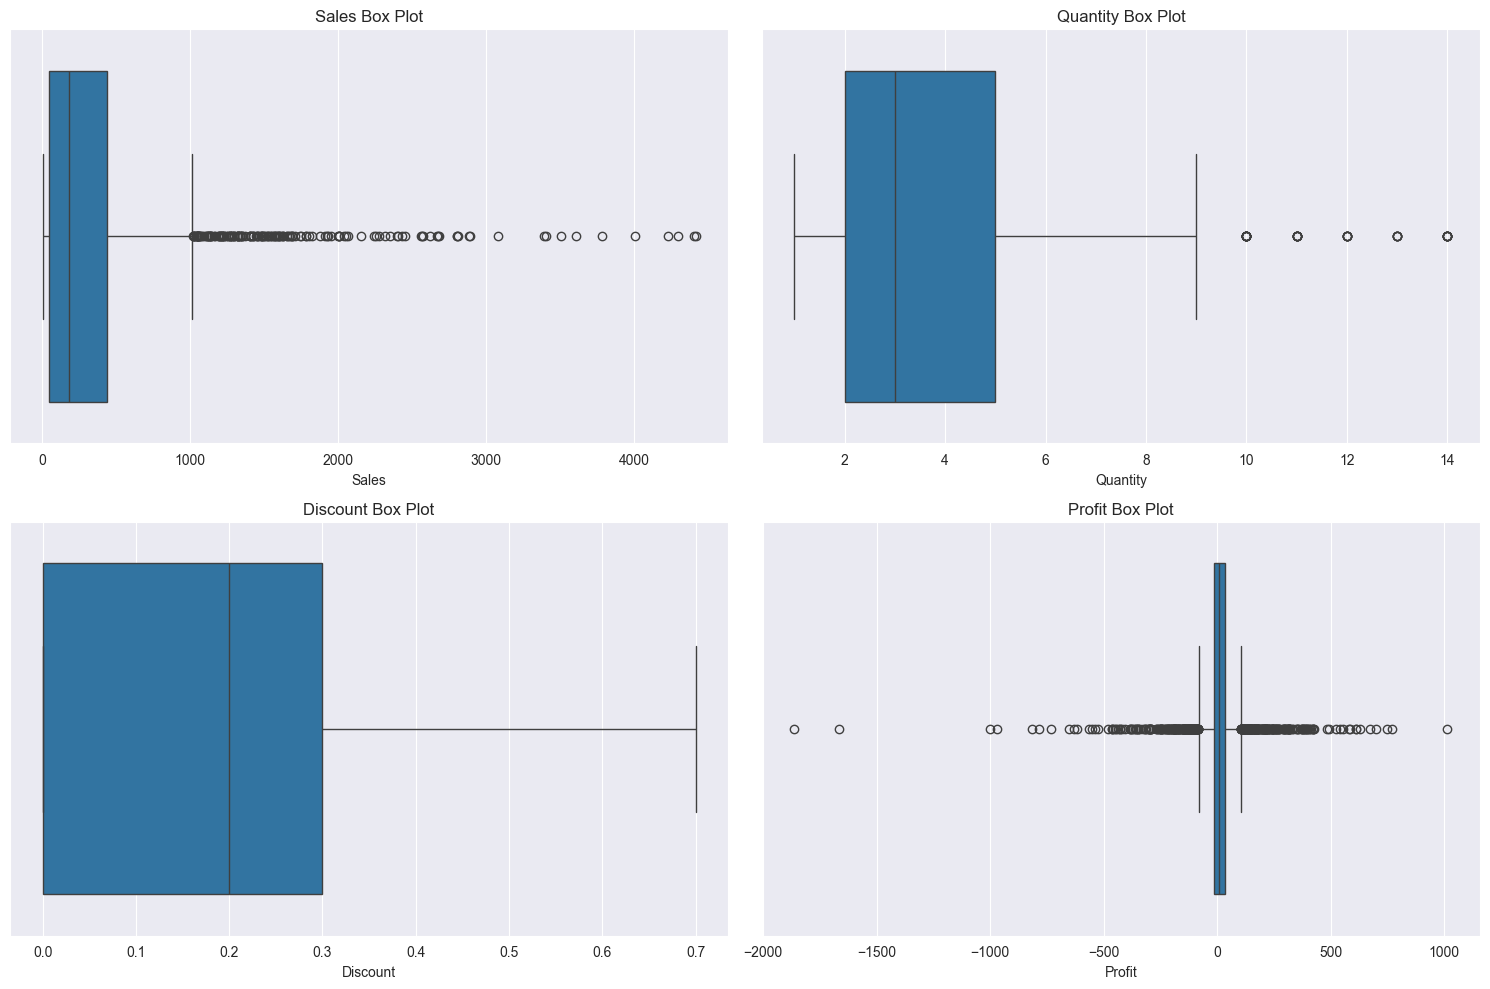

In [101]:
#Set up matplotlib figure
plt.figure(figsize=(15, 10))

#Histograms for numerical columns
plt.subplot(2,2,1)
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')

plt.subplot(2,2,2)
sns.histplot(df['Quantity'], kde=True)
plt.title('Quantity Distribution')

plt.subplot(2,2,3)
sns.histplot(df['Discount'], kde=True)
plt.title('Discount Distribution')

plt.subplot(2,2,4)
sns.histplot(df['Profit'], kde=True)
plt.title('Profit Distribution')

plt.tight_layout()
plt.show()

#Box plots for numerical columns
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.boxplot(x=df['Sales'])
plt.title('Sales Box Plot')

plt.subplot(2,2,2)
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Box Plot')

plt.subplot(2,2,3)
sns.boxplot(x=df['Discount'])
plt.title('Discount Box Plot')

plt.subplot(2,2,4)
sns.boxplot(x=df['Profit'])
plt.title('Profit Box Plot')

plt.tight_layout()
plt.show()

Visualization Analysis:
1. Sales distribution
- The sales data is right-skewed, indicating that most sales amounts are lower, with a few high-value sales.
- There are some significant outliers in the sales data
2. Quantity distribution
- The majority of orders contain a small number of items that between 2 and 5
- Meanwhile, there are a few orders have quantities above 10 which considered as outliers
3. Discount distribution
- Discounts are around certain values, but many orders have no discount
- The outliers have higher discount values
4. Profit distribution
- The distribution is right-skewed that many orders have low profits or even negative profits
- There are outliers with high negative and positive profits

Convert non-numerical and categorical columns to numerical ones. By looking at the columns' data type, we applied the change to `object` data type. Meanwhile, declared a new variable to store the changed columns for later using.

In [92]:
# Convert non-numerical columns into numerical using label encoding
label_encoder = LabelEncoder()

#Record the processed columns in converted data frame
converted_df = pd.DataFrame()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])
    converted_df[col] = df[col].copy()

### 2. Clean data


At this step, we will check is there any missing values in the datasets, remove or input a reasonable value into particular attribute. Then remove the outliers and standardising them which helps our model learn better.

In [93]:
# Check the data set if there is any missing value
missing_data = df.isnull().sum().to_frame()
print(missing_data)

               0
Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Customer Name  0
Segment        0
Country        0
City           0
State          0
Postal Code    0
Region         0
Product ID     0
Category       0
Sub-Category   0
Product Name   0
Sales          0
Quantity       0
Discount       0
Profit         0


As there is no missing values, we can skip drop the missing values or insert a value for missing columns. Next, Let's look at the outliers

In [94]:
# Identify outliers using IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
outliers = (df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))
print(outliers.sum())

#Removing outliers
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]

#Standardize data 
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode        327
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales            164
Quantity          39
Discount           0
Profit           407
dtype: int64


Remove the outliers using IQR method

### 3. Visualise data
Visualise the converted data which we recorded in previous steps and see what we can find.

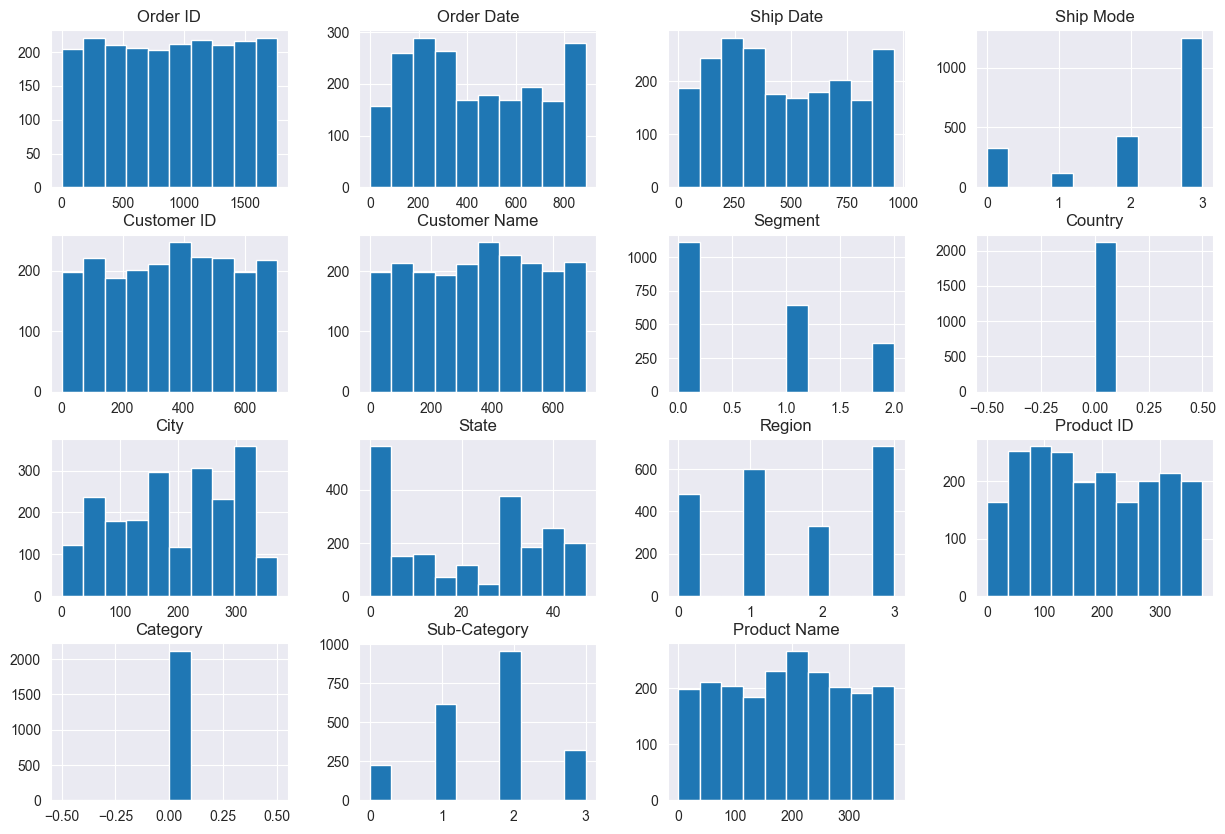

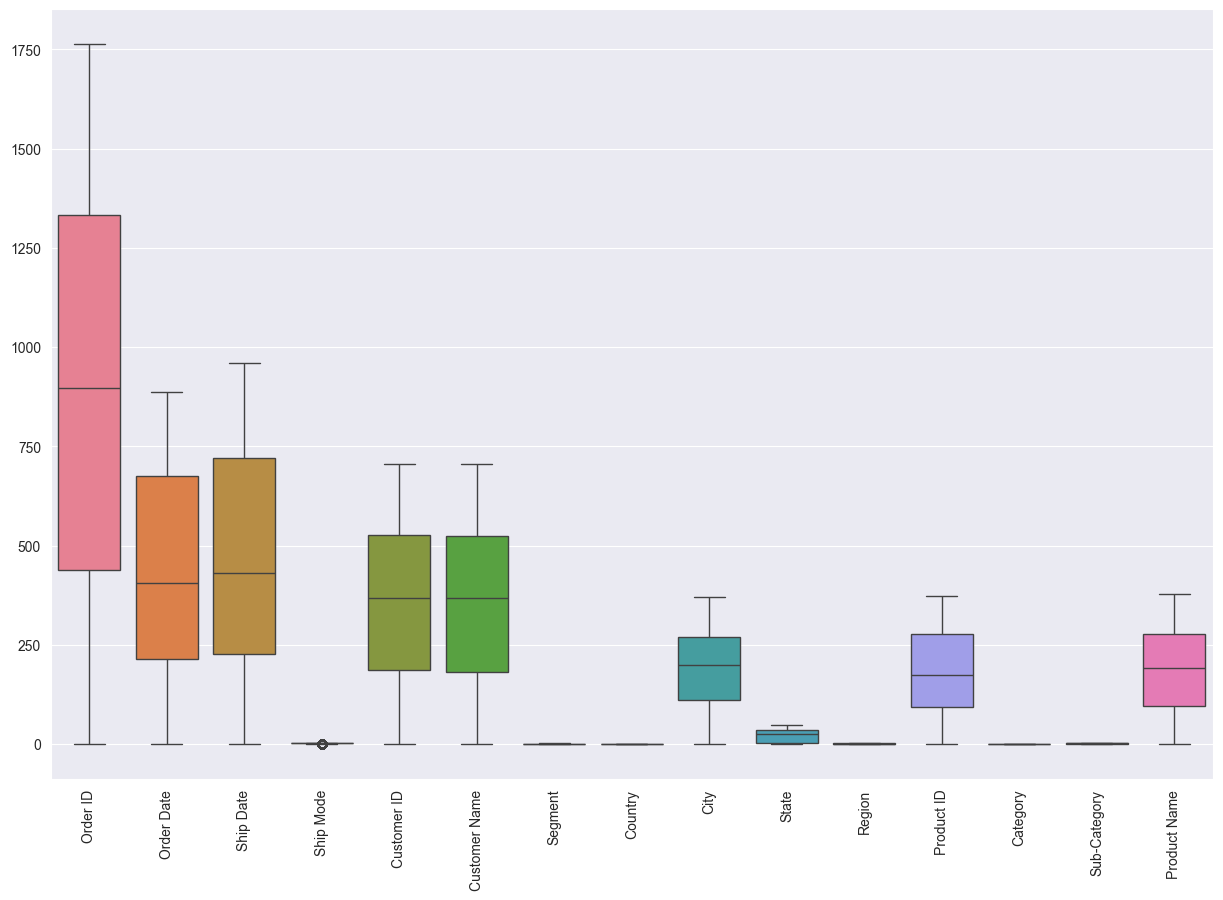

In [95]:
# Histograms for converted data
converted_df.hist(figsize=(15, 10))
plt.show()

# Visualize converted data by boxplot 
plt.figure(figsize=(15,10))
sns.boxplot(data=converted_df)
plt.xticks(rotation=90)
plt.show()

Visualization analysis:
- There are four ship modes
- There are three segments
- Order processed only in one country and four regions
- There are only one category and four sub-categories

### 4. Identify correlated variables
Using heatmap, we can find the correlation of each variable relates to the others. And, we can identify and highlight the apparent relationships between variables. 

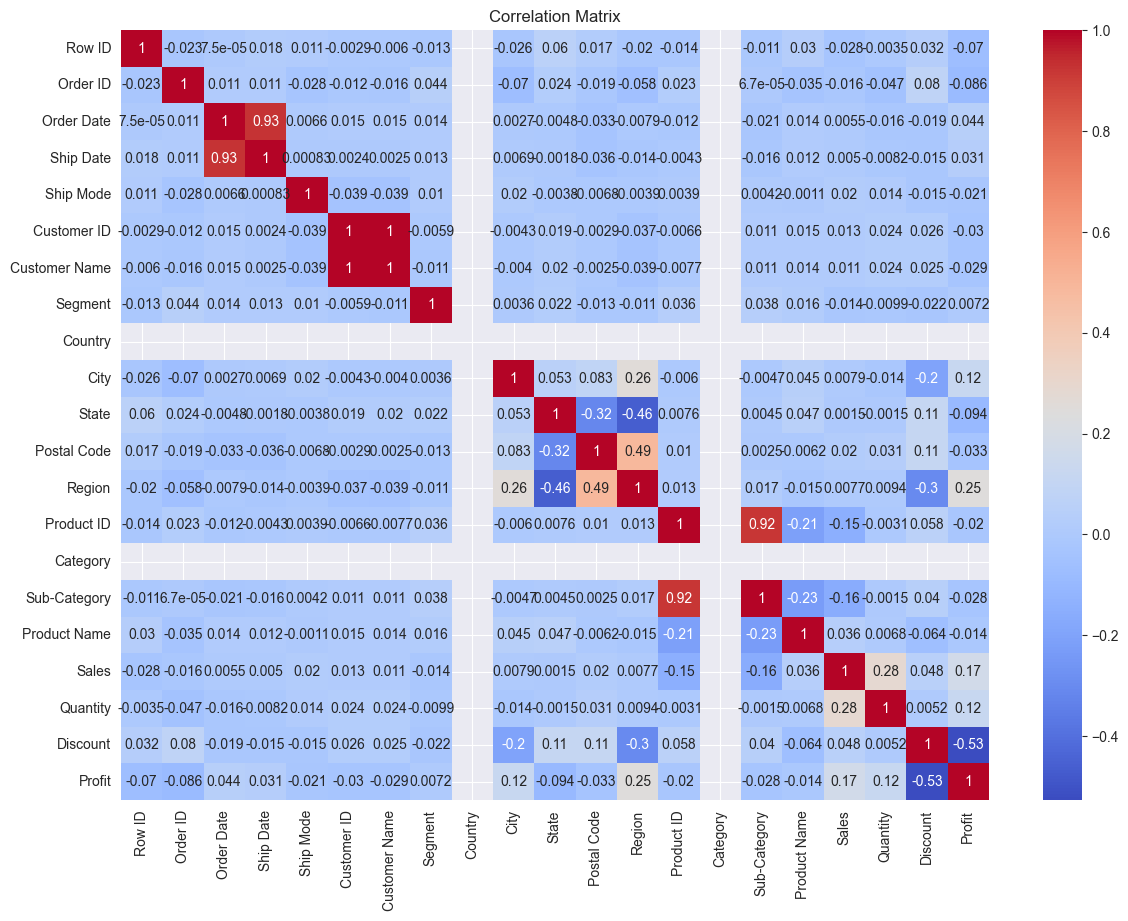

In [96]:
#Compute the correlation matrix
corr_matrix = df.corr()

#Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

From the matrix, we can see:
- Order Date has very strong relationship with Ship Date, it's obvious as product only ship out when order confirmed
- City, Postal Code and Region have strong relationships as these are location labels
- Sub-Category strong related with Product ID
- Profit has moderate relationship with Region, the region did impact the profit in some ways
- Sales and Quantity has some connection, quantity decided how many we can sell and will influence sales
- Profit has strong negative relationship with Discount, as the more discount of the order the less profit the order can gain

### 5. Summary

In this project, I performed Exploratory Data Analysis (EDA) and data preprocessing on a store sales dataset. Here are the steps I followed:

1. Loaded the dataset by pandas `read.csv` and displayed the first ten instances by `head(10)`.
2. Provided key statistical measures including mean, standard deviation, and data types of each column by `describle()` and `info()` separately.
3. Visualized the numerical columns using histograms and box plots to identify distributions and outliers.
4. Cleaned the data by handling missing values, removing outliers, and converting categorical columns to numerical values by `LabelEncoder`.
5. Identified correlations between variables using a correlation matrix and visualized it using a heatmap.

Key findings include:
- Sales data is right-skewed with significant outliers.
- Most orders consist of a small number of quantities and the data is right-skewed.
- Discount data distribution is right-skewed and most the items have no discount.
- Profit looks like left-skewed, many orders have no profit or even negative profits.
- We found profit has correlation with region and negative relationship with discount. Additionally, Sales are connected with quantities. Both of them influence each other.